# CI data analysis: basic plots

In [10]:
# import libraries
import os
import matplotlib.pyplot as plt
from math  import ceil
import matplotlib.gridspec as gridspec # for subplots
from utils import *
from datetime import datetime



# data preparation:
_dfs = load_data()

# countries to study:
countries = ['Ireland', 'Germany', 'Great Britain', 'France', 'Sweden', 'Finland', 'Belgium']
list_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'yellow']

# countries = ['Ireland', 'Germany', 'Great Britain']
# list_colors = ['red', 'green', 'blue']

## Plot raw data

### Hourly CI over the whole year

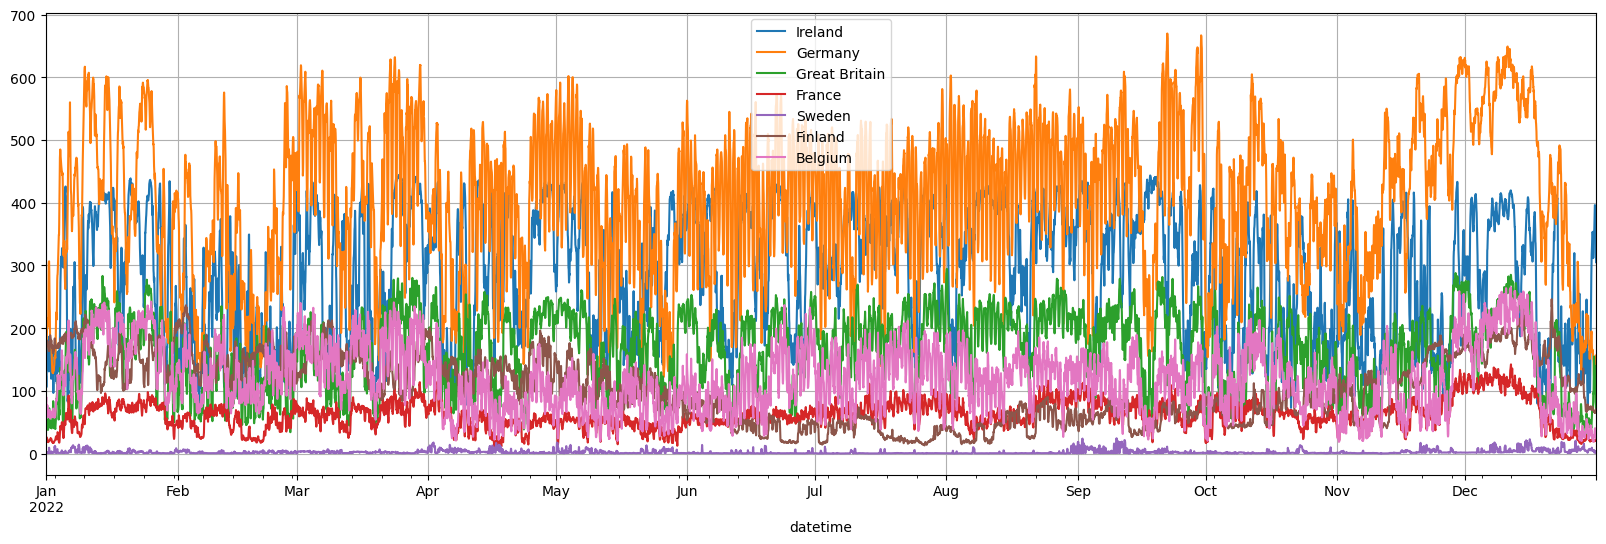

In [11]:
start_date = datetime(2022, 1, 1, 0, 0)
end_date = datetime(2022, 12, 31, 23, 59, 59)
display_CI(start_date, end_date, countries, _dfs)

### Hourly CI over each month

Here, we also prepare _stats_dfs that contains, for each country, the average and standard deviation over each month.

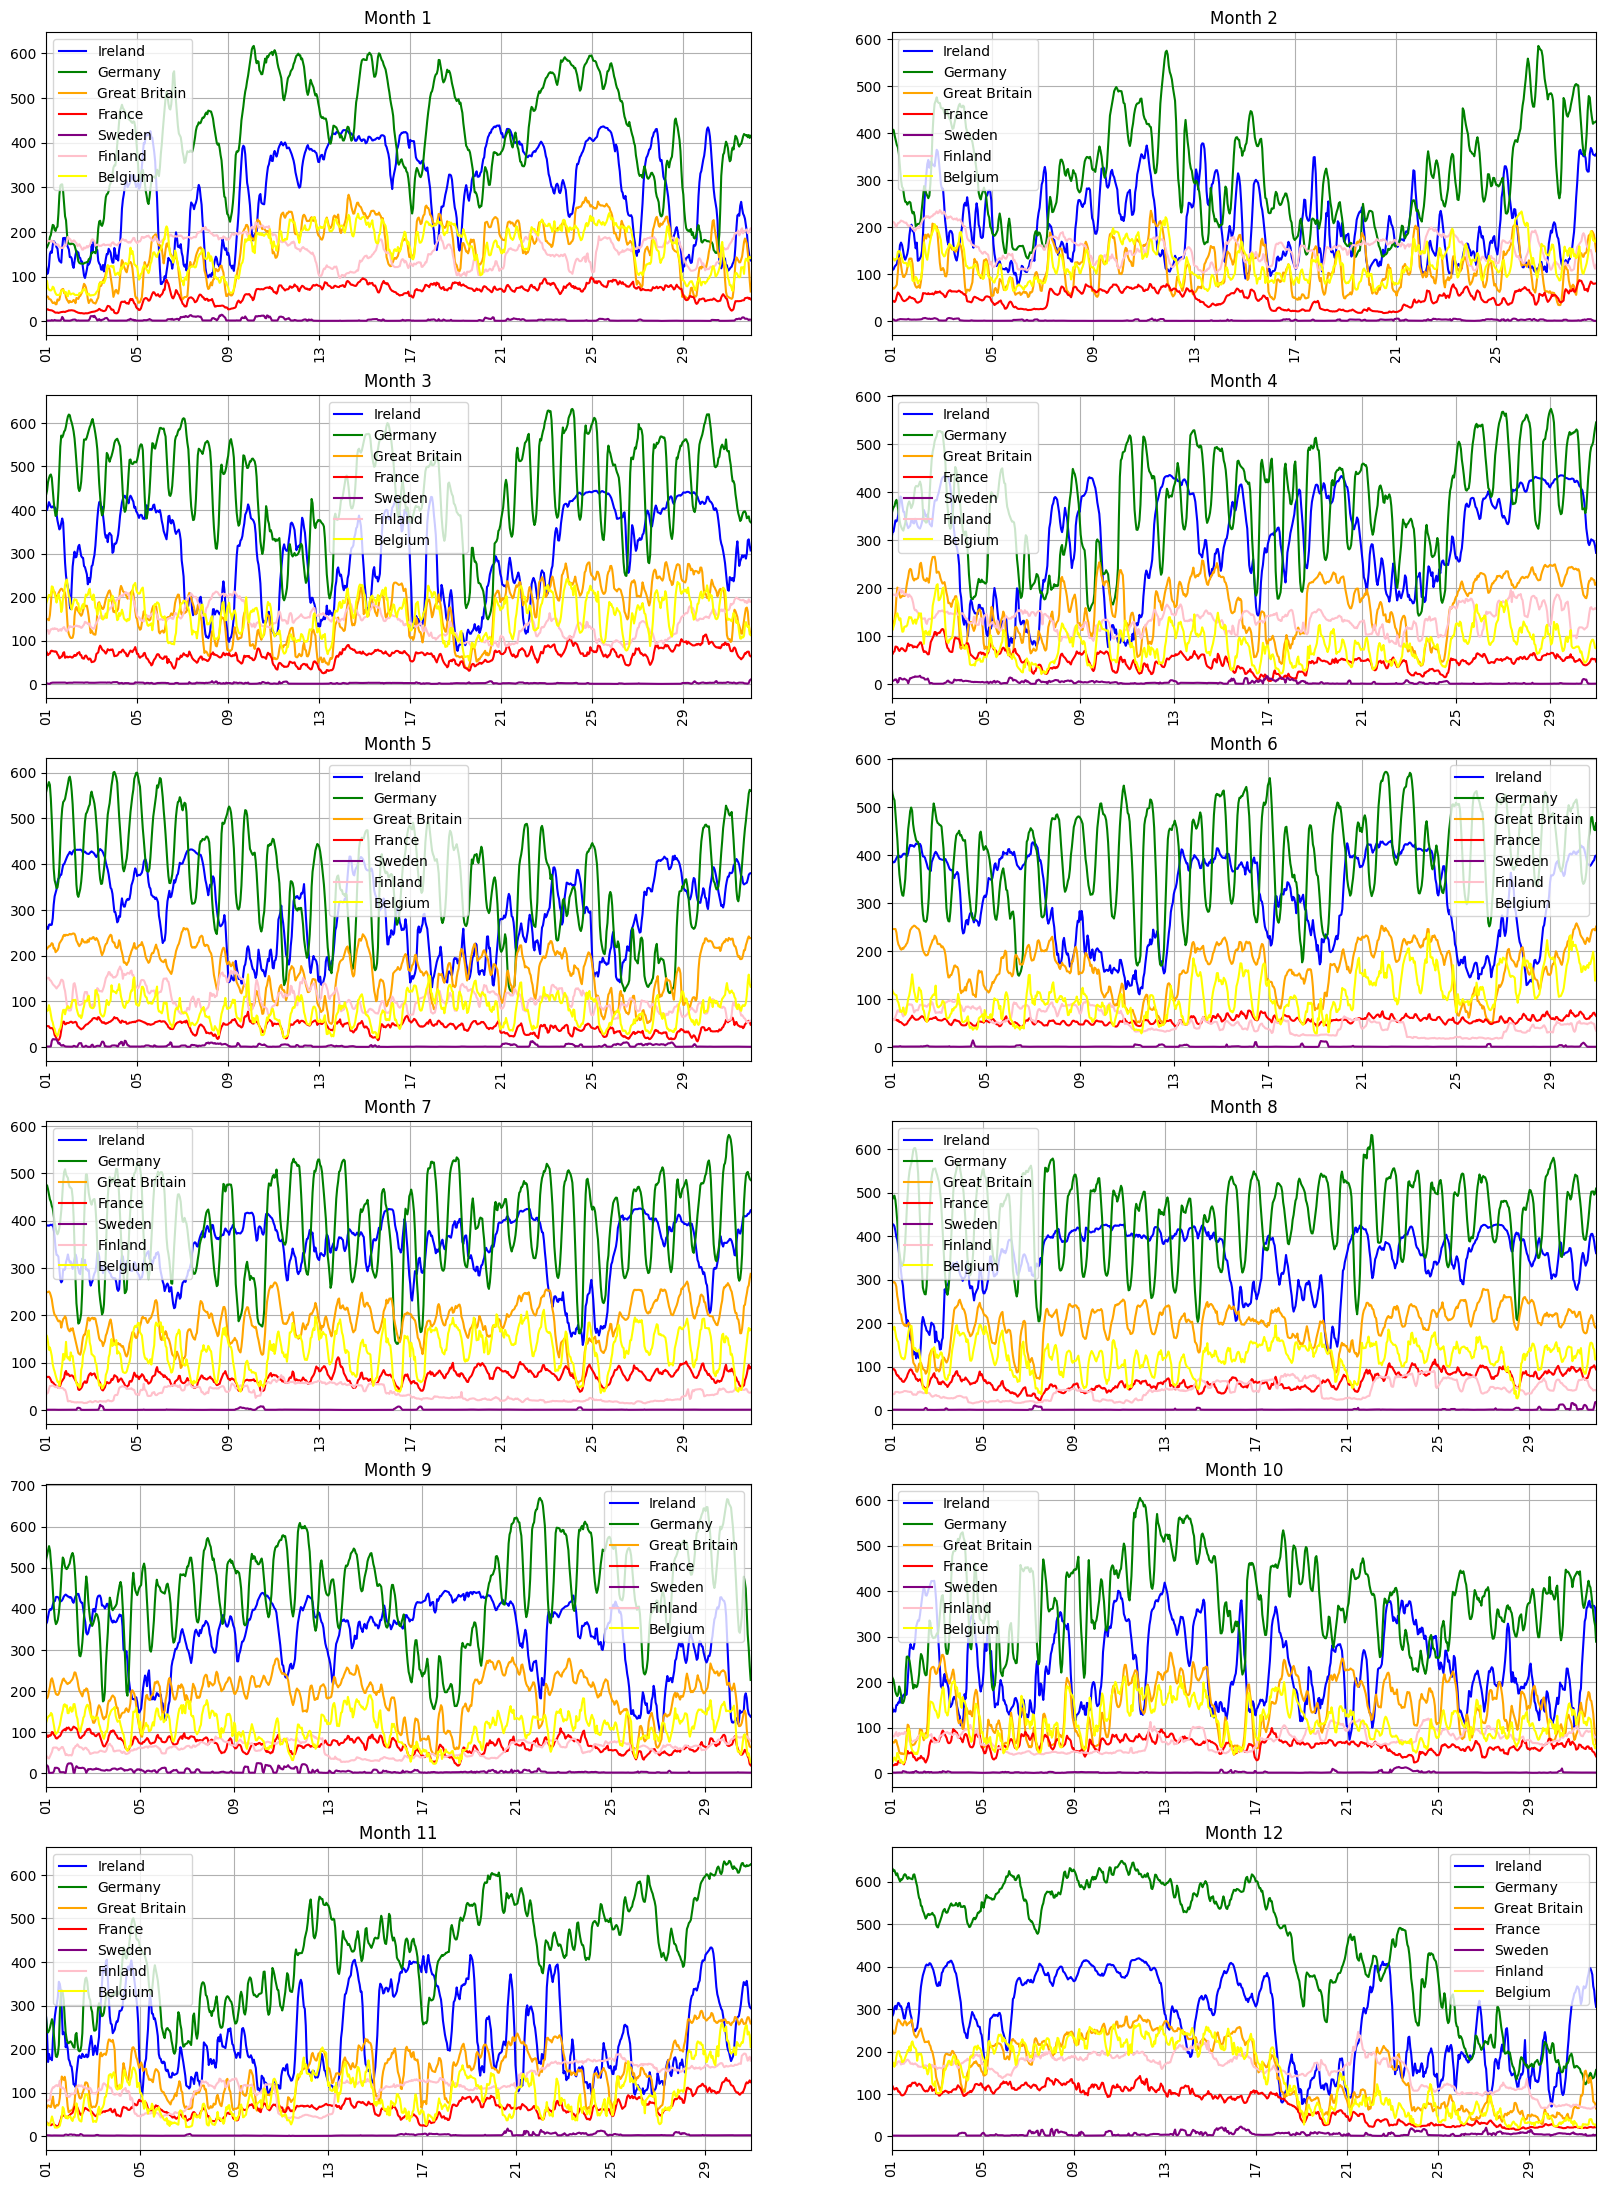

In [12]:
fig = plt.figure(figsize=(20, 27.5))
gs = gridspec.GridSpec(6, 2)
_stats_dfs = dict(zip(countries, [{'mean':list(), 'std':list()} for ii in range(len(countries))]))

for i in range(1, 13): # i is the month number

    start_date = datetime(2022, i, 1, 0, 0)
    end_date = datetime(2022, i, last_day(i), 23, 59)
    
    for country_idx, country in enumerate(countries):

        df_country = _dfs[country]
        df_to_plot = df_country[df_country['datetime'].between(start_date,end_date)]

        # compute and store mean and standard deviation for each month:
        _stats_dfs[country]['mean'].append(df_to_plot['CI_direct'].values.mean())
        _stats_dfs[country]['std'].append(df_to_plot['CI_direct'].values.std())

        # where to plot in the subplot:
        ind1, ind2 = ceil(i/2)-1, (i-1)%2
        ax = plt.subplot(gs[ind1, ind2])

        # plot:
        plt.plot(df_to_plot['datetime'].values, df_to_plot['CI_direct'].values, label=country, color = list_colors[country_idx])
        # _dfs_plot.plot(y='CI_direct', x='datetime', ax=axes[ind1, ind2], label=country, grid=True)

        # plot legend, axis, etc.:
        ax.set_xlim([df_to_plot['datetime'].values[0], df_to_plot['datetime'].values[-1]])
        plt.title('Month '+str(i))
        plt.legend()
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))
        ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d"))
        _ = plt.xticks(rotation=90)  
        plt.grid()

plt.show()

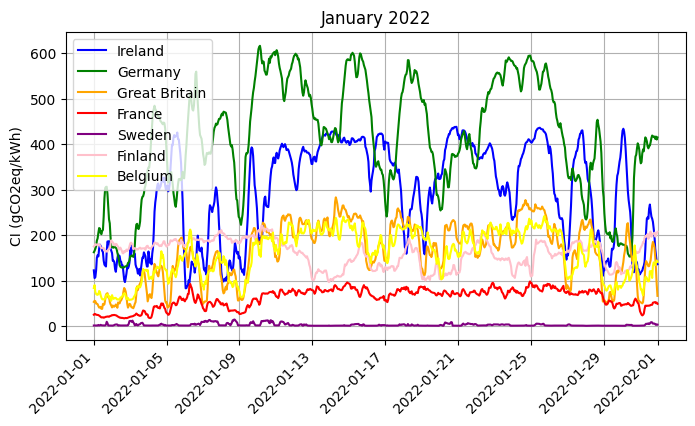

In [13]:
i=1

fig = plt.figure(figsize=(8, 4))

start_date = datetime(2022, i, 1, 0, 0)
end_date = datetime(2022, i, last_day(i), 23, 59)

for country_idx, country in enumerate(countries):

    df_country = _dfs[country]
    df_to_plot = df_country[df_country['datetime'].between(start_date,end_date)]

    # plot:
    plt.plot(df_to_plot['datetime'].values, df_to_plot['CI_direct'].values, label=country, color = list_colors[country_idx])

    # plot legend, axis, etc.:
    ax.set_xlim([df_to_plot['datetime'].values[0], df_to_plot['datetime'].values[-1]])
    plt.title('January 2022')
    plt.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d"))
    _ = plt.xticks(rotation=90)  
    plt.grid()
    plt.xticks(rotation=45, ha='right')  # rotate x-axis labels to diagonal
    plt.ylabel('CI (gCO2eq/kWh)')
plt.savefig(os.path.join('figures/january_raw_data.png'), bbox_inches='tight')
plt.show()

## Plot mean values

### Mean value of CI for each month

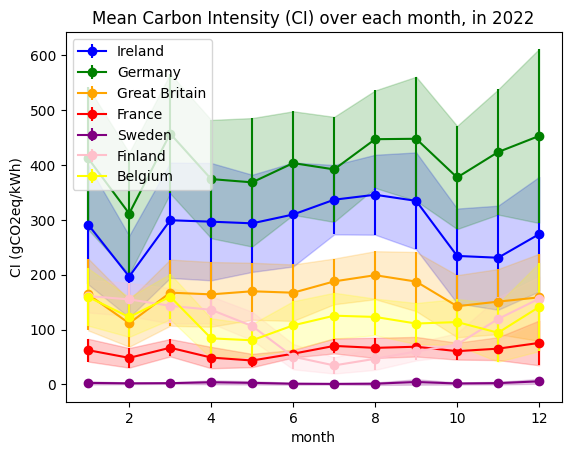

In [14]:
fig, ax = plt.subplots()

cpt=0
for country in countries:
    # _dfs_country = _dfs[country]
    # CI (Carbon Intensity) unit is in gCO2eq/kWh
    # _dfs_plot = _dfs_country[_dfs_country['datetime'].between(start_date,end_date)]

    # plt.plot([i+1 for i in range(12)], _stats_dfs[country]['mean'])

    x = [i+1 for i in range(12)]
    y = _stats_dfs[country]['mean']
    
    y_upper = [a+b for a,b in zip(_stats_dfs[country]['mean'], _stats_dfs[country]['std'])]
    y_lower = [a-b for a,b in zip(_stats_dfs[country]['mean'], _stats_dfs[country]['std'])]
    
    plt.errorbar(x, y, _stats_dfs[country]['std'], fmt='-o', color = list_colors[cpt], label = country)
    ax.fill_between(x, y_upper, y_lower, color=list_colors[cpt], alpha=0.2)

    plt.title('Mean Carbon Intensity (CI) over each month, in 2022')
    plt.xlabel('month')
    plt.ylabel('CI (gCO2eq/kWh)')
    plt.legend()
    # _dfs_plot.plot(y='CI_direct', x='datetime', ax=axes[ind1, ind2], label=country, grid=True)
    cpt+=1

### Mean CI of each day

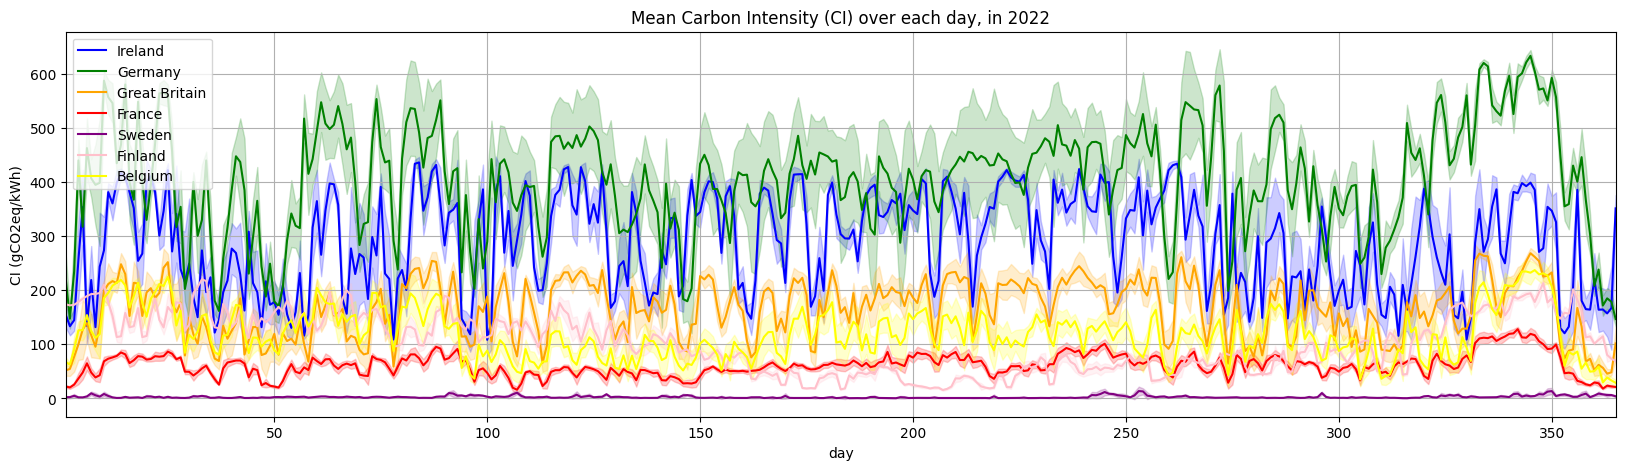

In [15]:

_stats_day = dict(zip(countries, [{'mean':list(), 'std':list()} for ii in range(len(countries))]))
for i in range(12):
    i+=1
    for j in range(last_day(i)):
        j+=1
        start_date = datetime(2022, i, j, 0, 0, 0)
        end_date = datetime(2022, i, j, 23, 59, 59)
        
        for country in countries:
            _dfs_country = _dfs[country]
            # CI (Carbon Intensity) unit is in gCO2eq/kWh
            _dfs_plot = _dfs_country[_dfs_country['datetime'].between(start_date,end_date)]

            _stats_day[country]['mean'].append(_dfs_plot['CI_direct'].values.mean())
            _stats_day[country]['std'].append(_dfs_plot['CI_direct'].values.std())
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
cpt=0
for country in countries:
    x = [i+1 for i in range(365)]
    y = _stats_day[country]['mean']
    y_upper = [a+b for a,b in zip(_stats_day[country]['mean'], _stats_day[country]['std'])]
    y_lower = [a-b for a,b in zip(_stats_day[country]['mean'], _stats_day[country]['std'])]

    plt.plot(x, y, color = list_colors[cpt], label = country)

    # plt.errorbar(x, y, _stats_day[country]['std'], fmt='-o', color = list_colors[cpt], label = country)
    ax.fill_between(x, y_upper, y_lower, color=list_colors[cpt], alpha=0.2)
    cpt+=1
ax.set_xlim([x[0], x[-1]])
plt.title('Mean Carbon Intensity (CI) over each day, in 2022')
plt.xlabel('day')
plt.ylabel('CI (gCO2eq/kWh)')
plt.legend()
plt.grid()
# plt.savefig(os.path.join('test.png'), bbox_inches='tight')

### Mean CI of the year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


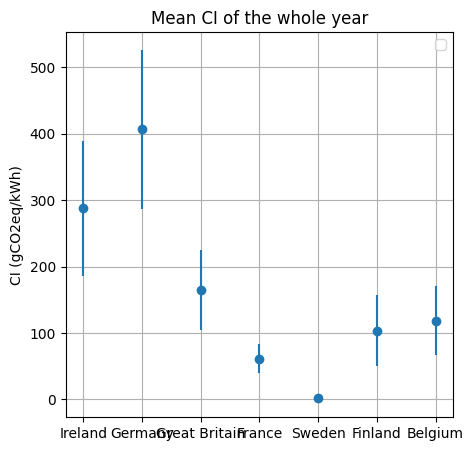

In [16]:
mean_year = []
std_year = []
for country in countries:
    _dfs_country = _dfs[country]
    # CI (Carbon Intensity) unit is in gCO2eq/kWh
    mean_year.append(_dfs_country['CI_direct'].values.mean())
    std_year.append(_dfs_country['CI_direct'].values.std())

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
x = countries
y = mean_year
y_upper = [a+b for a,b in zip(mean_year, std_year)]
y_lower = [a-b for a,b in zip(mean_year, std_year)]

# plt.plot(x, y)

plt.errorbar(x, y, std_year, fmt='o')
# ax.fill_between(x, y_upper, y_lower, color=list_colors[cpt], alpha=0.2)

# ax.set_xlim([x[0], x[-1]])
plt.title('Mean CI of the whole year')
plt.ylabel('CI (gCO2eq/kWh)')
plt.legend()
plt.grid()

## Appendix

In [17]:
# import plotly.graph_objs as go
# # fig, axes = plt.subplots(nrows=2, ncols=1)
# list_colors = ['150,0,0', '0,150,0', '0,0,150']
# cpt=0
# fig = go.Figure()
# for country in countries:
#     x = [i+1 for i in range(12)]
#     y = _stats_dfs[country]['mean']
#     y_upper = [a+b for a,b in zip(_stats_dfs[country]['mean'], _stats_dfs[country]['std'])]
#     y_lower = [a-b for a,b in zip(_stats_dfs[country]['mean'], _stats_dfs[country]['std'])]

#     fig.add_trace(
#     go.Scatter(
#         x=x,
#         y=y,
#         line=dict(color='rgb('+list_colors[cpt]+')'),
#         mode='lines+markers'
#     ))
#     fig.add_trace(
#     go.Scatter(
#         x=x+x[::-1], # x, then x reversed
#         y=y_upper+y_lower[::-1], # upper, then lower reversed
#         fill='toself',
#         fillcolor='rgba('+list_colors[cpt]+',0.2)',
#         line=dict(color='rgba(255,255,255,0)'),
#         hoverinfo="skip",
#         showlegend=False
#     ))
#     cpt+=1
# fig.update_layout(title_text='Mean CI over each month')
# fig.show()